### Installation

AutoGen requires Python version >= 3.8, < 3.13. It can be installed from pip:
```bash
pip install pyautogen
```

In [1]:
# Install autogen package
!pip install -qqq pyautogen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


### Case 1: Stock Price Change

In [ ]:
import csv
from typing import Dict, Union

from IPython import get_ipython
from IPython.display import Image, display

import autogen

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    # filter_dict={
    #     "model": ["gpt-4-turbo", "gpt-4-0125-preview", "gpt-4-0613", "gpt-3.5-turbo-0125	", "gpt-3.5-turbo-16k-0613"],
    # },
)

INFO: Example Of OAI_CONFIG_LIST

```python
[
  {
    "model": "gpt-4",
    "api_key": os.environ['OPENAI_API_KEY']
    "tags": ["openai"]
  },
  {
    "model": "my-gpt-4-deployment",
    "api_type": "azure",
    "api_key": os.environ['AZURE_OPENAI_API_KEY'],
    "base_url": "https://ENDPOINT.openai.azure.com/",
    "api_version": "2024-02-15-preview",
    "tags": ["azure", "openai"]
  },
  {
    "model": "llama-7B",
    "base_url": "http://localhost:1234",
    "tags": ["local"]
  }
]
```

In [ ]:
# Create an AssistantAgent instance
assistant = autogen.AssistantAgent(
    name="search-assistant",
    llm_config={
        # "cache_seed": 43,  # seed for caching and reproducibility
        "config_list": config_list,  # a list of LLM configurations
        "temperature": 0,  # temperature for sampling
    },
)

# Create a UserProxyAgent instance
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="TERMINATE",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "case-1",
        "use_docker": False,
    },
)

INFO: `human_input_mode`

`human_input_mode` str - whether to ask for human inputs every time a message is received. Possible values are "ALWAYS", "TERMINATE", "NEVER".
- (1) When "**ALWAYS**", the agent prompts for human input every time a message is received. Under this mode, the conversation stops when the human input is "exit", or when is_termination_msg is True and there is no human input.
- (2) When "**TERMINATE**", the agent only prompts for human input only when a termination message is received or the number of auto reply reaches the max_consecutive_auto_reply.
- (3) When "**NEVER**", the agent will never prompt for human input. Under this mode, the conversation stops when the number of auto reply reaches the max_consecutive_auto_reply or when is_termination_msg is True.

INFO: `code_execution_config`

<img src="https://microsoft.github.io/autogen/assets/images/code-executor-no-docker-0ec717a62637ff02e852efa284dd50d5.png" width="350" height="400"/>
<img src="https://microsoft.github.io/autogen/assets/images/code-executor-docker-8d3f56a6bb4b4605fec68804350f42fc.png" width="450" height="400"/>

`code_execution_config` dict or False - config for the code execution. To disable code execution, set to False. Otherwise, set to a dictionary with the following keys:
- **work_dir** (Optional, str): The working directory for the code execution. If None, a default working directory will be used. The default working directory is the "extensions" directory under "path_to_autogen".
- **use_docker** (Optional, list, str or bool): The docker image to use for code execution. Default is True, which means the code will be executed in a docker container. A default list of images will be used. If a list or a str of image name(s) is provided, the code will be executed in a docker container with the first image successfully pulled. If False, the code will be executed in the current environment. We strongly recommend using docker for code execution.
- **timeout** (Optional, int): The maximum execution time in seconds.
- **last_n_messages** (Experimental, Optional, int): The number of messages to look back for code execution. Default to 1.

In [ ]:
# Start chat by the user proxy
chat_res = user_proxy.initiate_chat(
    recipient=assistant,
    message="""
    Please provide a comparison of the year-to-date performance rates for NVIDIA Corporation (NVDA) and ASML Holding NV (ASML).
    Ensure that the data reflects actual historical performance rather than projected or estimated rates.
    """,
    summary_method="reflection_with_llm",
)

user_proxy (to search-assistant):


    Please provide a comparison of the year-to-date performance rates for NVIDIA Corporation (NVDA) and ASML Holding NV (ASML).
    Ensure that the data reflects actual historical performance rather than projected or estimated rates.
    

--------------------------------------------------------------------------------
search-assistant (to user_proxy):

To compare the year-to-date performance rates for NVIDIA Corporation (NVDA) and ASML Holding NV (ASML), we can retrieve historical stock price data for both companies for the current year. We will then calculate the year-to-date performance rates based on the stock prices at the beginning of the year and the current date.

Here's the plan:
1. Retrieve historical stock price data for NVDA and ASML for the current year.
2. Calculate the year-to-date performance rates for both companies.
3. Compare the year-to-date performance rates of NVDA and ASML.

Let's start by retrieving the historical stock price 

INFO: `summary_method`

`summary_method` str or callable - a method to get a summary from the chat. Default is DEFAULT_SUMMARY_METHOD, i.e., "last_msg".

Supported strings are "last_msg" and "reflection_with_llm":

- when set to "**last_msg**", it returns the last message of the dialog as the summary.

```python
def _last_msg_as_summary(sender, recipient, summary_args) -> str:
        """Get a chat summary from the last message of the recipient."""
        try:
            summary = recipient.last_message(sender)["content"].replace("TERMINATE", "")
        except (IndexError, AttributeError) as e:
            warnings.warn(f"Cannot extract summary using last_msg: {e}. Using an empty str as summary.", UserWarning)
            summary = ""
        return summary
```

- when set to "**reflection_with_llm**", it returns a summary extracted using an llm client. llm_config must be set in either the recipient or sender.

```python
def _reflection_with_llm_as_summary(sender, recipient, summary_args):
        prompt = summary_args.get("summary_prompt")
        prompt = ConversableAgent.DEFAULT_SUMMARY_PROMPT if prompt is None else prompt
        if not isinstance(prompt, str):
            raise ValueError("The summary_prompt must be a string.")
        msg_list = recipient.chat_messages_for_summary(sender)
        agent = sender if recipient is None else recipient
        try:
            summary = sender._reflection_with_llm(prompt, msg_list, llm_agent=agent, cache=summary_args.get("cache"))
        except BadRequestError as e:
            warnings.warn(
                f"Cannot extract summary using reflection_with_llm: {e}. Using an empty str as summary.", UserWarning
            )
            summary = ""
        return summary
```

- `DEFAULT_SUMMARY_PROMPT`, i.e., "Summarize takeaway from the conversation. Do not add any introductory phrases. If the intended request is NOT properly addressed, please point it out.

A callable summary_method should take the recipient and sender agent in a chat as input and return a string of summary. E.g.,

```python
def my_summary_method(
    sender: ConversableAgent,
    recipient: ConversableAgent,
    summary_args: dict,
):
    return recipient.last_message(sender)["content"]
```

INFO: `initiate_chat` results

The initiate_chat method returns a `ChatResult` object, which is a dataclass object storing information about the chat. Currently, it includes the following attributes:

- **chat_history**: a list of chat history.
- **summary**: a string of chat summary. A summary is only available if a summary_method is provided when initiating the chat.
- **cost**: a tuple of (total_cost, total_actual_cost), where total_cost is a dictionary of cost information, and total_actual_cost is a dictionary of information on the actual incurred cost with cache.
- **human_input**: a list of strings of human inputs solicited during the chat.

In [ ]:
print("Chat history:", chat_res.chat_history)

print("Summary:", chat_res.summary)
print("Cost info:", chat_res.cost)

Chat history: [{'content': '\n    Please provide a comparison of the year-to-date performance rates for NVIDIA Corporation (NVDA) and ASML Holding NV (ASML).\n    Ensure that the data reflects actual historical performance rather than projected or estimated rates.\n    ', 'role': 'assistant'}, {'content': "To compare the year-to-date performance rates for NVIDIA Corporation (NVDA) and ASML Holding NV (ASML), we can retrieve historical stock price data for both companies for the current year. We will then calculate the year-to-date performance rates based on the stock prices at the beginning of the year and the current date.\n\nHere's the plan:\n1. Retrieve historical stock price data for NVDA and ASML for the current year.\n2. Calculate the year-to-date performance rates for both companies.\n3. Compare the year-to-date performance rates of NVDA and ASML.\n\nLet's start by retrieving the historical stock price data for NVDA and ASML for the current year.", 'role': 'user'}, {'content': '

In [ ]:
# Follow-up question to the comparison results
user_proxy.send(
    recipient=assistant,
    message="""Create a chart displaying the year-to-date change in their stock price, save the data as "stock_price_ytd.csv", and export the chart as "stock_price_ytd.png.""",
)

user_proxy (to search-assistant):

Create a chart displaying the year-to-date change in their stock price, save the data as "stock_price_ytd.csv", and export the chart as "stock_price_ytd.png.

--------------------------------------------------------------------------------
search-assistant (to user_proxy):

```python
# filename: stock_price_chart.py

import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime('%Y-%m-%d')

# Define the ticker symbols for NVDA and ASML
nvda_symbol = 'NVDA'
asml_symbol = 'ASML'

# Retrieve historical stock price data for NVDA and ASML for the current year
nvda_data = yf.download(nvda_symbol, start='2024-01-01', end=current_date)
asml_data = yf.download(asml_symbol, start='2024-01-01', end=current_date)

# Calculate the year-to-date change in stock price for NVDA and ASML
nvda_data['YTD Change'] = (nvda_data['Close'] - nvda_data['Close'][0]) / nvda_data['Close'][0] * 10

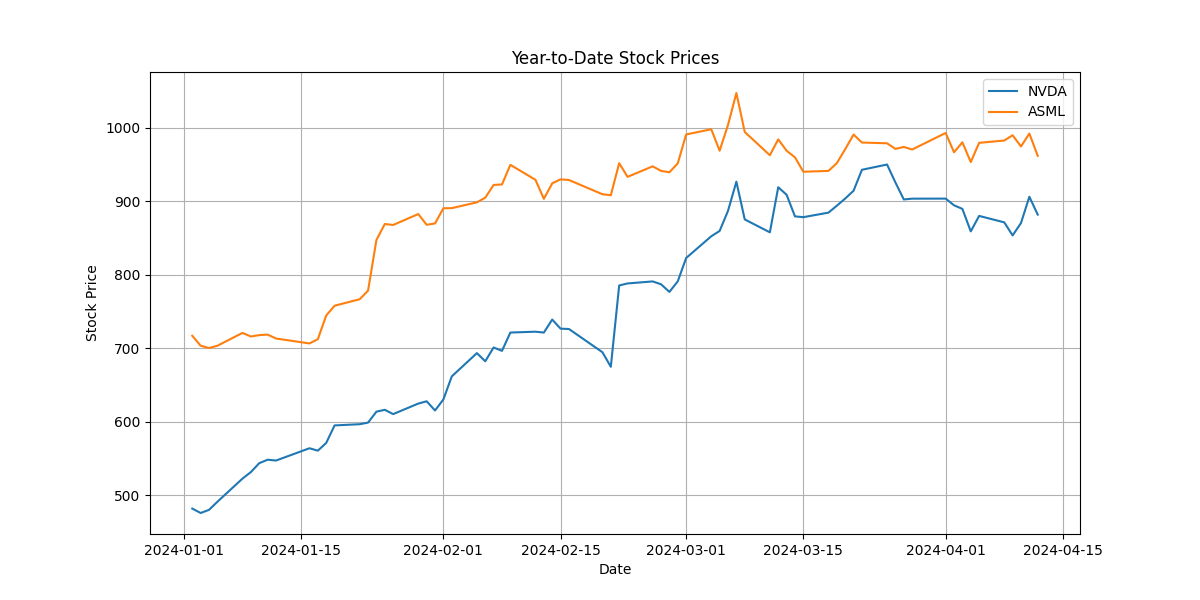

In [ ]:
# Display the figure from the saved file
try:
    image = Image(filename="case-1/stock_price_ytd.png")
    display(image)
# Error message
except FileNotFoundError:
    print("Image not found. Please check the file name and modify if necessary.")

In [ ]:
# Path to your CSV file
file_path = "case-1/stock_price_ytd.csv"

# Display the collected data
try:
    with open(file_path, mode="r", encoding="utf-8") as file:
        # Read each line in the file
        for line in file:
            # Split the line into a list using the comma (since a CSV file)
            row = line.strip().split(",")
            # Print the list representing the current row
            print(row)
# Error message
except FileNotFoundError:
    print("File not found. Please check the file name and modify if necessary.")

['Date', 'NVDA', 'ASML']
['2024-01-02', '481.67999267578125', '716.9199829101562']
['2024-01-03', '475.69000244140625', '703.3699951171875']
['2024-01-04', '479.9800109863281', '700.2899780273438']
['2024-01-05', '490.9700012207031', '703.3400268554688']
['2024-01-08', '522.530029296875', '720.8400268554688']
['2024-01-09', '531.4000244140625', '715.9500122070312']
['2024-01-10', '543.5', '717.7899780273438']
['2024-01-11', '548.219970703125', '718.530029296875']
['2024-01-12', '547.0999755859375', '713.219970703125']
['2024-01-16', '563.8200073242188', '706.5']
['2024-01-17', '560.530029296875', '712.27001953125']
['2024-01-18', '571.0700073242188', '744.530029296875']
['2024-01-19', '594.9099731445312', '757.8300170898438']
['2024-01-22', '596.5399780273438', '766.6799926757812']
['2024-01-23', '598.72998046875', '778.3900146484375']
['2024-01-24', '613.6199951171875', '847.3099975585938']
['2024-01-25', '616.1699829101562', '869.0800170898438']
['2024-01-26', '610.3099975585938', '8

In [ ]:
# Task: Analyze the collected data

def my_message_generator(sender, recipient, context):
    # The file name
    file_name = context.get("file_name")
    # Read it
    try:
        with open(file_name, mode="r", encoding="utf-8") as file:
            file_content = file.read()
    # Error message
    except FileNotFoundError:
        file_content = "No data found."

    # Return the prompt
    return "Review the provided data below and craft a concise, captivating blog post. \n Data: \n" + file_content

# Follow-up question
chat_res = user_proxy.initiate_chat(
    recipient=assistant,
    message=my_message_generator, # callable
    file_name="case-1/stock_price_ytd.csv",
)

user_proxy (to search-assistant):

Review the provided data below and craft a concise, captivating blog post. 
 Data: 
Date,NVDA,ASML
2024-01-02,481.67999267578125,716.9199829101562
2024-01-03,475.69000244140625,703.3699951171875
2024-01-04,479.9800109863281,700.2899780273438
2024-01-05,490.9700012207031,703.3400268554688
2024-01-08,522.530029296875,720.8400268554688
2024-01-09,531.4000244140625,715.9500122070312
2024-01-10,543.5,717.7899780273438
2024-01-11,548.219970703125,718.530029296875
2024-01-12,547.0999755859375,713.219970703125
2024-01-16,563.8200073242188,706.5
2024-01-17,560.530029296875,712.27001953125
2024-01-18,571.0700073242188,744.530029296875
2024-01-19,594.9099731445312,757.8300170898438
2024-01-22,596.5399780273438,766.6799926757812
2024-01-23,598.72998046875,778.3900146484375
2024-01-24,613.6199951171875,847.3099975585938
2024-01-25,616.1699829101562,869.0800170898438
2024-01-26,610.3099975585938,867.75
2024-01-29,624.6500244140625,882.6199951171875
2024-01-30,627.7

In [ ]:
print(chat_res.cost)

{'usage_including_cached_inference': {'total_cost': 0.012570500000000002, 'gpt-3.5-turbo-0125': {'cost': 0.012570500000000002, 'prompt_tokens': 17287, 'completion_tokens': 2618, 'total_tokens': 19905}}, 'usage_excluding_cached_inference': {'total_cost': 0.012570500000000002, 'gpt-3.5-turbo-0125': {'cost': 0.012570500000000002, 'prompt_tokens': 17287, 'completion_tokens': 2618, 'total_tokens': 19905}}}


In [ ]:
!python case-1/stock_performance_comparison.py

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Year-to-date performance rate for NVDA: 83.08%
Year-to-date performance rate for ASML: 34.16%


In [ ]:
# Task: Create a customed ProxyAgent for IPython execution

class IPythonUserProxyAgent(autogen.UserProxyAgent):
    def __init__(self, name: str, **kwargs):
        super().__init__(name, **kwargs)
        self._ipython = get_ipython()

    def run_code(self, code, **kwargs):
        # Execute code, capturing output to 'cap'.
        result = self._ipython.run_cell("%%capture --no-display cap\n" + code)

        # Retrieve standard output from 'cap'.
        log = self._ipython.ev("cap.stdout")

        # Append standard error to log.
        log += self._ipython.ev("cap.stderr")

        # Append execution result if not None.
        if result.result is not None:
            log += str(result.result)

        # Set default exit code; change if errors.
        exitcode = 0 if result.success else 1

        # Log pre-execution errors, update exit code.
        if result.error_before_exec is not None:
            log += f"\n{result.error_before_exec}"
            exitcode = 1

        # Log execution errors, update exit code.
        if result.error_in_exec is not None:
            log += f"\n{result.error_in_exec}"
            exitcode = 1

        # Return exit code, log, and placeholder for future use.
        return exitcode, log, None


def my_ipy_message_generator(sender, recipient, context):
    raw_message = context.get("raw_message", "")
    carryover = context.get("carryover", "")
    return raw_message + carryover + "If you suggest code, the code will be executed in IPython."

In [ ]:
# Create the IPythonUserProxyAgent instance
ipy_user = IPythonUserProxyAgent(
    name="ipython_user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
    or x.get("content", "").rstrip().endswith('"TERMINATE".'),
    code_execution_config={
        "use_docker": False,
    },
)
# Start the chat by the ipy_user_proxy
ipy_user.initiate_chat(
    assistant,
    message=my_ipy_message_generator,
    raw_message="""Please create a chart comparing the year-to-date stock price gains of NVIDIA (NVDA) and ASML. """,
    carryover="Check if the file 'case-1/stock_price_ytd.csv' exists and read its data using Python's `pandas` module; if the file doesn't exist, determine an alternative method to retrieve the data.",
)

ipython_user_proxy (to search-assistant):

Please create a chart comparing the year-to-date stock price gains of NVIDIA (NVDA) and ASML. Check if the file 'case-1/stock_price_ytd.csv' exists and read its data using Python's `pandas` module; if the file doesn't exist, determine an alternative method to retrieve the data.If you suggest code, the code will be executed in IPython.

--------------------------------------------------------------------------------
search-assistant (to ipython_user_proxy):

```python
# filename: retrieve_stock_data.py
import pandas as pd
import os

# Check if the file exists
file_path = 'case-1/stock_price_ytd.csv'
if os.path.exists(file_path):
    # Read the data using pandas
    stock_data = pd.read_csv(file_path)

    # Filter data for NVIDIA and ASML
    nvidia_data = stock_data[stock_data['Stock'] == 'NVDA']
    asml_data = stock_data[stock_data['Stock'] == 'ASML']

    # Calculate year-to-date gains
    nvidia_ytd_gain = nvidia_data['Close'].iloc[-1] - n

ChatResult(chat_id=None, chat_history=[{'content': "Please create a chart comparing the year-to-date stock price gains of NVIDIA (NVDA) and ASML. Check if the file 'case-1/stock_price_ytd.csv' exists and read its data using Python's `pandas` module; if the file doesn't exist, determine an alternative method to retrieve the data.If you suggest code, the code will be executed in IPython.", 'role': 'assistant'}, {'content': '```python\n# filename: retrieve_stock_data.py\nimport pandas as pd\nimport os\n\n# Check if the file exists\nfile_path = \'case-1/stock_price_ytd.csv\'\nif os.path.exists(file_path):\n    # Read the data using pandas\n    stock_data = pd.read_csv(file_path)\n\n    # Filter data for NVIDIA and ASML\n    nvidia_data = stock_data[stock_data[\'Stock\'] == \'NVDA\']\n    asml_data = stock_data[stock_data[\'Stock\'] == \'ASML\']\n\n    # Calculate year-to-date gains\n    nvidia_ytd_gain = nvidia_data[\'Close\'].iloc[-1] - nvidia_data[\'Close\'].iloc[0]\n    asml_ytd_gain = 

In [ ]:
!zip -r /content/case-1.zip /content/case-1

  adding: content/case-1/ (stored 0%)
  adding: content/case-1/stock_price_chart.py (deflated 56%)
  adding: content/case-1/stock_performance_comparison.py (deflated 63%)
  adding: content/case-1/stock_price_ytd.csv (deflated 70%)
  adding: content/case-1/stock_price_ytd.png (deflated 7%)


### Case 2: Code execution in Conversable Agents

In [ ]:
# !pip install -qqq matplotlib numpy

In [ ]:
import tempfile

import autogen
from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

In [ ]:
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
)

In [ ]:
# Declare a code writer sys message
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

# Create a code writer agent
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": config_list},
    code_execution_config=False,  # Just want this agent to write code
)

In [ ]:
# Create a temporary directory to store the code files
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # timeout for each code execution in seconds
    work_dir=temp_dir.name,  # the temporary directory to store the code files
)

# Create an agent with code executor configuration
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent
    code_execution_config={"executor": executor},  # Use the local command line code executor
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety
)

INFO: `LocalCommandLineCodeExecutor` can only execute the followings; `ClassVar[List[str]] = ["bash", "shell", "sh", "pwsh", "powershell", "ps1", "python"]`

In [ ]:
# Start conversation by the code executor agent (as proxy)
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Write Python code to calculate the 10th Fibonacci number.",
)

code_executor_agent (to code_writer_agent):

Write Python code to calculate the 10th Fibonacci number.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

```
# filename: fibonacci.py

# Function to calculate the nth Fibonacci number
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

# Calculate the 10th Fibonacci number
tenth_fibonacci = fibonacci(10)
print(tenth_fibonacci)
```

--------------------------------------------------------------------------------
Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 

>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: 55


----------------------------

In [ ]:
print("Chat history:", chat_result.chat_history)

print("Summary:", chat_result.summary)
print("Cost info:", chat_result.cost)

Chat history: [{'content': 'Write Python code to calculate the 10th Fibonacci number.', 'role': 'assistant'}, {'content': '```\n# filename: fibonacci.py\n\n# Function to calculate the nth Fibonacci number\ndef fibonacci(n):\n    if n <= 1:\n        return n\n    else:\n        return fibonacci(n-1) + fibonacci(n-2)\n\n# Calculate the 10th Fibonacci number\ntenth_fibonacci = fibonacci(10)\nprint(tenth_fibonacci)\n```', 'role': 'user'}, {'content': 'exitcode: 0 (execution succeeded)\nCode output: 55\n', 'role': 'assistant'}, {'content': 'Terminate', 'role': 'user'}, {'content': 'how to validate the 10th fibonacci number rather than code execution', 'role': 'assistant'}, {'content': 'To validate the 10th Fibonacci number manually, you can calculate the sequence up to the 10th number and verify if the 10th number is correct.\n\nHere is the Fibonacci sequence up to the 10th number:\n1, 1, 2, 3, 5, 8, 13, 21, 34, 55\n\nThe 10th Fibonacci number is 55.\n\nTherefore, the calculated value of 55

### Case 3: Research With Multiple Agents



In [ ]:
!pip install -qqq pyautogen

In [10]:
import autogen

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
)
gpt35_config = {
    # "cache_seed": 123,
    "temperature": 0,
    "config_list": config_list,
    "timeout": 120,
}

In [16]:
# Create the proxy agent
user_proxy = autogen.UserProxyAgent(
    name="Admin",
    human_input_mode="TERMINATE",
    system_message="A human admin. Interact with the planner to discuss the plan. Plan execution needs to be approved by this admin.",
    code_execution_config={"work_dir": "case-3"},
)
# Create the assistant engineer
engineer = autogen.AssistantAgent(
    name="Engineer",
    llm_config=gpt35_config,
    system_message="""Engineer. You follow an approved plan. You write python/shell code to solve tasks. Wrap the code in a code block that specifies the script type. The user can't modify your code. So do not suggest incomplete code which requires others to modify. Don't use a code block if it's not intended to be executed by the executor.
Don't include multiple code blocks in one response. Do not ask others to copy and paste the result. Check the execution result returned by the executor.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
""",
)
# Create the assistant scientist
scientist = autogen.AssistantAgent(
    name="Scientist",
    llm_config=gpt35_config,
    system_message="""Scientist. You follow an approved plan. You are able to categorize papers after seeing their abstracts printed. You don't write code.""",
)
# Create the assistant planner
planner = autogen.AssistantAgent(
    name="Planner",
    system_message="""Planner. Suggest a plan. Revise the plan based on feedback from admin and critic, until admin approval.
The plan may involve an engineer who can write code and a scientist who doesn't write code.
Explain the plan first. Be clear which step is performed by an engineer, and which step is performed by a scientist.
""",
    llm_config=gpt35_config,
)
# Create the executor
executor = autogen.UserProxyAgent(
    name="Executor",
    system_message="Executor. Execute the code written by the engineer and report the result.",
    human_input_mode="TERMINATE",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "case-3",
        "use_docker": False,
    },
)
# Create the assistant critic
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="Critic. Double check plan, claims, code from other agents and provide feedback. Check whether the plan includes adding verifiable info such as source URL.",
    llm_config=gpt35_config,
)

# Construct the GroupChat instance
groupchat = autogen.GroupChat(
    agents=[user_proxy, engineer, scientist, planner, executor, critic], messages=[], max_round=30
)
# Create the group chat manager
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=gpt35_config)

INFO: `class GroupChat()`

- **agents**: a list of participating agents.
- **messages**: a list of messages in the group chat.
- **max_round**: the maximum number of rounds.
- **admin_name**: the name of the admin agent if there is one. Default is "Admin". `KeyBoardInterrupt` will make the admin agent take over.
- **func_call_filter**: whether to enforce function call filter. Default is True. When set to True and when a message is a function call suggestion, the next speaker will be chosen from an agent which contains the corresponding function name in its function_map.
- **select_speaker_message_template**: customize the select speaker message (used in "auto" speaker selection), which appears first in the message context and generally includes the agent descriptions and list of agents. The string value will be converted to an f-string, use "{roles}" to output the agent's and their role descriptions and "{agentlist}" for a comma-separated list of agent names in square brackets. The default value is: "You are in a role play game. The following roles are available: {roles}. Read the following conversation. Then select the next role from {agentlist} to play. Only return the role."
- **select_speaker_prompt_template**: customize the select speaker prompt (used in "auto" speaker selection), which appears last in the message context and generally includes the list of agents and guidance for the LLM to select the next agent. The string value will be converted to an f-string, use "{agentlist}" for a comma-separated list of agent names in square brackets. The default value is: "Read the above conversation. Then select the next role from {agentlist} to play. Only return the role."
- **speaker_selection_method**: the method for selecting the next speaker. Default is "auto". Could be any of the following (case insensitive), will raise ValueError if not recognized:
  - "auto": the next speaker is selected automatically by LLM.
  - "manual": the next speaker is selected manually by user input.
  - "random": the next speaker is selected randomly.
  - "round_robin": the next speaker is selected in a round robin fashion, i.e., iterating in the same order as provided in agents.
  - a customized speaker selection function (Callable): the function will be called to select the next speaker. The function should take the last speaker and the group chat as input and return one of the following:
    - an Agent class, it must be one of the agents in the group chat.
    - a string from ['auto', 'manual', 'random', 'round_robin'] to select a default method to use.
    - None, which would terminate the conversation gracefully.
- **allow_repeat_speaker**: whether to allow the same speaker to speak consecutively. Default is True, in which case all speakers are allowed to speak consecutively. If allow_repeat_speaker is a list of Agents, then only those listed agents are allowed to repeat. If set to False, then no speakers are allowed to repeat. allow_repeat_speaker and allowed_or_disallowed_speaker_transitions are mutually exclusive.
- **allowed_or_disallowed_speaker_transitions**: dict. The keys are source agents, and the values are agents that the key agent can/can't transit to, depending on speaker_transitions_type. Default is None, which means all agents can transit to all other agents. allow_repeat_speaker and allowed_or_disallowed_speaker_transitions are mutually exclusive.
- **speaker_transitions_type**: whether the speaker_transitions_type is a dictionary containing lists of allowed agents or disallowed agents. "allowed" means the allowed_or_disallowed_speaker_transitions is a dictionary containing lists of allowed agents. If set to "disallowed", then the allowed_or_disallowed_speaker_transitions is a dictionary containing lists of disallowed agents. Must be supplied if allowed_or_disallowed_speaker_transitions is not None.
- **enable_clear_history**: enable possibility to clear history of messages for agents manually by providing "clear history" phrase in user prompt. This is experimental feature. See description of GroupChatManager.clear_agents_history function for more info.
- **send_introductions**: send a round of introductions at the start of the group chat, so agents know who they can speak to (default: False)
- **role_for_select_speaker_messages**: sets the role name for speaker selection when in 'auto' mode, typically 'user' or 'system'. (default: 'system')
- **custom_speaker_selection_func**: python definition `custom_speaker_selection_func(last_speaker: Agent, groupchat: GroupChat) -> Union[Agent, str, None]`: A custom function for selecting the next speaker.

In [17]:
task = """Search for recent academic papers published on arXiv (using arXiv package) within the last week focusing on the large language model applications.
Limit your search by 25 papers in total. Prepare a markdown table categorized by different domains. Show the results."""

In [18]:
# Start chat by the user proxy
user_proxy.initiate_chat(
    manager,
    message=task,
)

Admin (to chat_manager):

Search for recent academic papers published on arXiv (using arXiv package) within the last week focusing on the large language model applications.
Limit your search by 25 papers in total. Prepare a markdown table categorized by different domains. Show the results.

--------------------------------------------------------------------------------
Engineer (to chat_manager):

```python
from arxiv import query
from datetime import datetime, timedelta

# Define the search query
search_query = "large language model applications"
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# Search for recent academic papers on arXiv
papers = query(query=search_query, max_results=25, start_date=start_date, end_date=end_date)

# Initialize domain categories
domains = {
    "Natural Language Processing": [],
    "Machine Learning": [],
    "Artificial Intelligence": [],
    "Computer Vision": [],
    "Others": []
}

# Categorize papers by domain
for paper

ChatResult(chat_id=None, chat_history=[{'content': 'Search for recent academic papers published on arXiv (using arXiv package) within the last week focusing on the large language model applications.\nLimit your search by 25 papers in total. Prepare a markdown table categorized by different domains. Show the results.', 'role': 'assistant'}, {'content': '```python\nfrom arxiv import query\nfrom datetime import datetime, timedelta\n\n# Define the search query\nsearch_query = "large language model applications"\nstart_date = datetime.now() - timedelta(days=7)\nend_date = datetime.now()\n\n# Search for recent academic papers on arXiv\npapers = query(query=search_query, max_results=25, start_date=start_date, end_date=end_date)\n\n# Initialize domain categories\ndomains = {\n    "Natural Language Processing": [],\n    "Machine Learning": [],\n    "Artificial Intelligence": [],\n    "Computer Vision": [],\n    "Others": []\n}\n\n# Categorize papers by domain\nfor paper in papers:\n    categori

In [19]:
# Task: Re-run without a critic

# Exclude the critic from the group chat
groupchat_nocritic = autogen.GroupChat(
    agents=[user_proxy, engineer, scientist, planner, executor], messages=[], max_round=20
)

# Reset agents before running the conversation once more
for agent in groupchat.agents:
    agent.reset()

# Create the chat manager
manager_nocritic = autogen.GroupChatManager(groupchat=groupchat_nocritic, llm_config=gpt35_config)

In [20]:
# Start chat by the user proxy
user_proxy.initiate_chat(
    manager_nocritic,
    message=task,
)

Admin (to chat_manager):

Search for recent academic papers published on arXiv (using arXiv package) within the last week focusing on the large language model applications.
Limit your search by 25 papers in total. Prepare a markdown table categorized by different domains. Show the results.

--------------------------------------------------------------------------------
Engineer (to chat_manager):

```python
from arxiv import query
from datetime import datetime, timedelta

# Define the search query
search_query = "large language model applications"
start_date = datetime.now() - timedelta(days=7)
end_date = datetime.now()

# Search for recent academic papers on arXiv
papers = query(query=search_query, max_results=25, start_date=start_date, end_date=end_date)

# Initialize domain categories
domains = {
    "Natural Language Processing": [],
    "Machine Learning": [],
    "Artificial Intelligence": [],
    "Computer Vision": [],
    "Others": []
}

# Categorize papers by domain
for paper

ChatResult(chat_id=None, chat_history=[{'content': 'Search for recent academic papers published on arXiv (using arXiv package) within the last week focusing on the large language model applications.\nLimit your search by 25 papers in total. Prepare a markdown table categorized by different domains. Show the results.', 'role': 'assistant'}, {'content': '```python\nfrom arxiv import query\nfrom datetime import datetime, timedelta\n\n# Define the search query\nsearch_query = "large language model applications"\nstart_date = datetime.now() - timedelta(days=7)\nend_date = datetime.now()\n\n# Search for recent academic papers on arXiv\npapers = query(query=search_query, max_results=25, start_date=start_date, end_date=end_date)\n\n# Initialize domain categories\ndomains = {\n    "Natural Language Processing": [],\n    "Machine Learning": [],\n    "Artificial Intelligence": [],\n    "Computer Vision": [],\n    "Others": []\n}\n\n# Categorize papers by domain\nfor paper in papers:\n    categori

EXPERIMENTAL: Custom Speaker Selection

```python
def custom_speaker_selection_func(last_speaker: autogen.Agent, groupchat: autogen.GroupChat):
    """Define a customized speaker selection function including the critic role.
    The critic reviews plans, claims, and code, providing feedback before final approval or execution.

    Returns:
        Return an `Agent` class or a string from ['auto', 'manual', 'random', 'round_robin'] to select a default method to use.
    """
    messages = groupchat.messages

    if len(messages) <= 1:
        return planner

    if last_speaker is user_proxy:
        if "Approve" in messages[-1]["content"]:
            # If the last message is an approval, let the critic speak to review the plan or code before execution
            return critic
        elif messages[-2]["name"] == "Planner":
            # If it is the planning stage, let the planner to continue
            return planner
        elif messages[-2]["name"] == "Scientist":
            # If the last message is from the scientist, let the scientist to continue
            return scientist

    elif last_speaker is planner:
        # After the planner speaks, the critic should review the plan
        return critic

    elif last_speaker is engineer:
        if "```python" in messages[-1]["content"]:
            # If the last message is a python code block, let the critic review the code before execution
            return critic
        else:
            # Otherwise, let the engineer to continue
            return engineer

    elif last_speaker is executor:
        if "exitcode: 1" in messages[-1]["content"]:
            # If the last message indicates an error, let the engineer to improve the code
            return engineer
        else:
            # Otherwise, let the scientist to speak
            return scientist

    elif last_speaker is scientist:
        # After the scientist speaks, the critic can review any scientific claims
        return critic

    elif last_speaker is critic:
        # Depending on the content of the critic's feedback, choose who should act next
        if "revision required" in messages[-1]["content"]:
            # If the critic requests a revision, let the originator of the message revise (planner, engineer)
            if messages[-2]["name"] == "Planner":
                return planner
            elif messages[-2]["name"] == "Engineer":
                return engineer
            else:
                return user_proxy
        else:
            # If no revisions are needed, let the admin approve and move forward
            return user_proxy

    else:
        return "random"
```

### Case 4: Sequence of Chats

In [21]:
import autogen

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
)
llm_config = {"config_list": config_list}

In [22]:
# Sequential tasks
financial_tasks = [
    """What are the current stock prices of NVDA and ASML, and how is the performance over the past month in terms of percentage change?""",
    """Investigate possible reasons of the stock performance leveraging market news.""",
]

writing_tasks = ["""Develop an engaging blog post using any information provided."""]

In [23]:
# Create the financial assistant
financial_assistant = autogen.AssistantAgent(
    name="Financial_assistant",
    llm_config=llm_config,
)
# Create the research assistant
research_assistant = autogen.AssistantAgent(
    name="Researcher",
    llm_config=llm_config,
)
# Create the writer assistant
writer = autogen.AssistantAgent(
    name="writer",
    llm_config=llm_config,
    system_message="""
        You are a professional writer, known for
        your insightful and engaging articles.
        You transform complex concepts into compelling narratives.
        Reply "TERMINATE" in the end when everything is done.
        """,
)

# Create the user proxy agent for financial and research tasks
user_proxy_auto = autogen.UserProxyAgent(
    name="User_Proxy_Auto",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "") and x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "last_n_messages": 1,
        "work_dir": "tasks",
        "use_docker": False, # no need docker since executing it in colab
    },
)

# Create the user proxy agent for the writing task
user_proxy = autogen.UserProxyAgent(
    name="User_Proxy",
    human_input_mode="ALWAYS",  # ask human for input at each step
    is_termination_msg=lambda x: x.get("content", "") and x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "last_n_messages": 1,
        "work_dir": "tasks",
        "use_docker": False,
    },
)

INFO: `initiate_chats`

Initiate a list of chats.

Arguments:

chat_queue List[Dict] - A list of dictionaries containing the information about the chats.

Each dictionary should contain the input arguments for ConversableAgent.initiate_chat. For example:

- **sender**: the sender agent.
- **recipient**: the recipient agent.
- **clear_history** (bool): whether to clear the chat history with the agent. Default is True.
  - Clears history of messages for all agents or selected one. Can preserve selected number of last messages. That function is called when user manually provide "clear history" phrase in his reply. When "clear history" is provided, the history of messages for all agents is cleared.
    - When "clear history <agent_name>" is provided, the history of messages for selected agent is cleared. When "clear history <nr_of_messages_to_preserve>" is provided, the history of messages for all agents is cleared except last <nr_of_messages_to_preserve> messages.
    - When "clear history <agent_name> <nr_of_messages_to_preserve>" is provided, the history of messages for selected agent is cleared except last <nr_of_messages_to_preserve> messages.
    - Phrase "clear history" and optional arguments are cut out from the reply before it passed to the chat.
- **silent** (bool or None): (Experimental) whether to print the messages in this conversation. Default is False.
- **cache** (Cache or None): the cache client to use for this conversation. Default is None.
- **max_turns** (int or None): maximum number of turns for the chat. If None, the chat will continue until a termination condition is met. Default is None.
- **summary_method** (str or callable): a string or callable specifying the method to get a summary from the chat. Default is DEFAULT_summary_method, i.e., "last_msg".
- **summary_args** (dict): a dictionary of arguments to be passed to the summary_method. Default is {}.
  - `summary_prompt`:
    ```
    Summarize the scraped content and format summary EXACTLY as follows:
    ---
    *Company name*:
    `Acme Corp`
    ---
    *Website*:
    `acmecorp.com`
    ---
    *Description*:
    `Company that does things.`
    ---
    *Tags*:
    `Manufacturing. Retail. E-commerce.`
    ---
    *Takeaways*:
    `Provides shareholders with value by selling products.`
    ---
    *Questions*:
    `What products do they sell? How do they make money? What is their market share?`
    ---
    ```
- **message** (str, callable or None): if None, input() will be called to get the initial message.
- **context**: additional context information to be passed to the chat.
- **carryover**: It can be used to specify the carryover information to be passed to this chat. If provided, we will combine this carryover with the "message" content when generating the initial chat message in generate_init_message.

In [24]:
# Iniatiate chats
chat_results = autogen.initiate_chats(
    [
        {
            "sender": user_proxy_auto,
            "recipient": financial_assistant,
            "message": financial_tasks[0],
            "clear_history": True,
            "silent": False,
            "summary_method": "last_msg",
        },
        {
            "sender": user_proxy_auto,
            "recipient": research_assistant,
            "message": financial_tasks[1],
            "max_turns": 2,  # max number of turns for demo purposes
            "summary_method": "reflection_with_llm",
        },
        {
            "sender": user_proxy,
            "recipient": writer,
            "message": writing_tasks[0],
            "carryover": "I want to include a figure or a table of data in the blogpost.",
        },
    ]
)


********************************************************************************
Starting a new chat....

********************************************************************************
User_Proxy_Auto (to Financial_assistant):

What are the current stock prices of NVDA and ASML, and how is the performance over the past month in terms of percentage change?

--------------------------------------------------------------------------------
Financial_assistant (to User_Proxy_Auto):

To get the current stock prices of NVDA (NVIDIA) and ASML, as well as their performance over the past month in terms of percentage change, I will need to fetch this information using a financial data API.

Let's start by retrieving the current stock prices of NVDA and ASML and calculating the percentage change over the past month. 

I will use the Alpha Vantage API to get this information. Let's proceed with the code to fetch and calculate the required data.

--------------------------------------------------

### Case 5: RAG vs No-RAG

In [25]:
!pip install -qqq pyautogen[retrievechat]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies .

In [26]:
import chromadb
from typing_extensions import Annotated

import autogen
from autogen import AssistantAgent
from autogen.agentchat.contrib.retrieve_user_proxy_agent import RetrieveUserProxyAgent

config_list = autogen.config_list_from_json("OAI_CONFIG_LIST")

In [32]:
# Define the task
PROBLEM = "Could you provide a clearer explanation on how to utilize Apache Spark for parallel training in FLAML, along with some example code?"

In [33]:
def termination_msg(x):
    return isinstance(x, dict) and "TERMINATE" == str(x.get("content", ""))[-9:].upper()


boss = autogen.UserProxyAgent(
    name="Boss",
    is_termination_msg=termination_msg,
    human_input_mode="NEVER",
    code_execution_config=False,  # we don't want to execute code in this case.
    default_auto_reply="Reply `TERMINATE` if the task is done.",
    description="The boss who ask questions and give tasks.",
)

boss_aid = RetrieveUserProxyAgent(
    name="Boss_Assistant",
    is_termination_msg=termination_msg,
    human_input_mode="NEVER",
    max_consecutive_auto_reply=3,
    retrieve_config={
        "task": "code",
        "docs_path": "https://raw.githubusercontent.com/microsoft/FLAML/main/website/docs/Examples/Integrate%20-%20Spark.md",
        "chunk_token_size": 1000,
        "model": config_list[0]["model"],
        "client": chromadb.PersistentClient(path="/tmp/chromadb"),
        "collection_name": "groupchat",
        "get_or_create": True,
    },
    code_execution_config=False,  # we don't want to execute code in this case.
    description="Assistant who has extra content retrieval power for solving difficult problems.",
)

coder = AssistantAgent(
    name="Senior_Python_Engineer",
    is_termination_msg=termination_msg,
    system_message="You are a senior python engineer, you provide python code to answer questions. Reply `TERMINATE` in the end when everything is done.",
    llm_config={"config_list": config_list, "timeout": 60, "temperature": 0},
    description="Senior Python Engineer who can write code to solve problems and answer questions.",
)

pm = autogen.AssistantAgent(
    name="Product_Manager",
    is_termination_msg=termination_msg,
    system_message="You are a product manager. Reply `TERMINATE` in the end when everything is done.",
    llm_config={"config_list": config_list, "timeout": 60, "temperature": 0},
    description="Product Manager who can design and plan the project.",
)

reviewer = autogen.AssistantAgent(
    name="Code_Reviewer",
    is_termination_msg=termination_msg,
    system_message="You are a code reviewer. Reply `TERMINATE` in the end when everything is done.",
    llm_config={"config_list": config_list, "timeout": 60, "temperature": 0},
    description="Code Reviewer who can review the code.",
)

INFO: `RetrieveUserProxyAgent`

- **name (str)** - Name of the agent.

- **human_input_mode (str)** - Specifies whether to ask for human inputs every time a message is received. Possible values:
  - **ALWAYS**: The agent prompts for human input every time a message is received. The conversation stops when the human input is "exit", or when `is_termination_msg` is True and there is no human input.
  - **TERMINATE**: The agent only prompts for human input when a termination message is received or the number of auto replies reaches the `max_consecutive_auto_reply`.
  - **NEVER**: The agent will never prompt for human input. The conversation stops when the number of auto replies reaches the `max_consecutive_auto_reply` or when `is_termination_msg` is True.

- **is_termination_msg (function)** - A function that takes a message in the form of a dictionary and returns a boolean value indicating if this received message is a termination message. The dictionary can contain the following keys: "content", "role", "name", "function_call".

- **retrieve_config (dict or None)** - Configuration for the retrieve agent. Set to `None` to use default config, or provide a dictionary with the following keys:
  - **task (Optional, str)** - The task of the retrieve chat. Possible values are "code", "qa", and "default". The default value is "default", which supports both code and QA, and provides source information at the end of the response.
  - **client (Optional, chromadb.Client)** - The chromadb client. A default client `chromadb.Client()` will be used if no key is provided.
  - **docs_path (Optional, Union[str, List[str]])** - The path to the docs directory, a single file, or a list of directories, files, and URLs.
  - **extra_docs (Optional, bool)** - When true, allows adding documents with unique IDs without overwriting existing ones; when false, it replaces existing documents using default IDs.
  - **collection_name (Optional, str)** - The name of the collection. Defaults to "autogen-docs" if not provided.
  - **model (Optional, str)** - The model to use for the retrieve chat. Defaults to "gpt-4" if not provided.
  - **chunk_token_size (Optional, int)** - The chunk token size for the retrieve chat. Defaults to `max_tokens * 0.4` if not provided.
  - **context_max_tokens (Optional, int)** - The context max token size for the retrieve chat. Defaults to `max_tokens * 0.8` if not provided.
  - **chunk_mode (Optional, str)** - The chunk mode for the retrieve chat. Possible values are "multi_lines" and "one_line". Defaults to "multi_lines" if not provided.
  - **must_break_at_empty_line (Optional, bool)** - Chunk will only break at empty line if true. Default is true.
  - **embedding_model (Optional, str)** - The embedding model to use for the retrieve chat. Defaults to "all-MiniLM-L6-v2".
  - **embedding_function (Optional, Callable)** - The embedding function for creating the vector db. Uses `SentenceTransformer` with the given embedding model by default.
  - **customized_prompt (Optional, str)** - The customized prompt for the retrieve chat. Default is None.
  - **customized_answer_prefix (Optional, str)** - The customized answer prefix for the retrieve chat. Default is "".
  - **update_context (Optional, bool)** - If false, will not apply Update Context for interactive retrieval. Default is true.
  - **get_or_create (Optional, bool)** - If true, will create/return a collection for the retrieve chat. Default is false.
  - **custom_token_count_function (Optional, Callable)** - A custom function to count the number of tokens in a string.
  - **custom_text_split_function (Optional, Callable)** - A custom function to split a string into a list of strings.
  - **custom_text_types (Optional, List[str])** - A list of file types to be processed.
  - **recursive (Optional, bool)** - Whether to search documents recursively in the `docs_path`. Default is true.

- **\*\*kwargs (dict)** - Other keyword arguments in `UserProxyAgent`.

INFO: Customize your `RetrieveUserProxyAgent`

Example of overriding retrieve_docs - If you have set up a customized vector db, and it's not compatible with chromadb, you can easily plug in it with below code.

```python
class MyRetrieveUserProxyAgent(RetrieveUserProxyAgent):
    def query_vector_db(
        self,
        query_texts: List[str],
        n_results: int = 10,
        search_string: str = "",
        **kwargs,
    ) -> Dict[str, Union[List[str], List[List[str]]]]:
        # Define your own query function here
        # ChromaDB example: https://github.com/microsoft/autogen/blob/90883904c5645e05e59883dae300b580062e8841/autogen/agentchat/contrib/retrieve_user_proxy_agent.py#L417
        pass

    def retrieve_docs(self, problem: str, n_results: int = 20, search_string: str = "", **kwargs):
        results = self.query_vector_db(
            query_texts=[problem],
            n_results=n_results,
            search_string=search_string,
            **kwargs,
        )

        self._results = results
        print("doc_ids: ", results["ids"])
```

In [34]:
def _reset_agents():
    """
    Resets the state of all agents involved in the chat simulation.

    This function calls the reset method on each of the agent instances, ensuring they
    are in their initial state before starting a new simulation of the group chat.
    """
    boss.reset()       # Reset the state of the boss agent
    boss_aid.reset()   # Reset the state of the boss's aid agent
    coder.reset()      # Reset the state of the coder agent
    pm.reset()         # Reset the state of the project manager agent
    reviewer.reset()   # Reset the state of the reviewer agent


def rag_chat():
    """
    Conducts a restricted agent group chat simulation using a round-robin speaker selection.

    This function sets up a group chat environment where the boss' aid acts as the user proxy
    agent. It initializes the chat with specific configurations and begins the interaction
    based on a predefined problem.
    """
    _reset_agents()    # Reset all agents to their initial state

    # Create the group chat instance
    groupchat = autogen.GroupChat(
        agents=[boss_aid, pm, coder, reviewer],  # List of agents participating in the chat
        messages=[],  # Initialize with no prior messages
        max_round=12,  # Set the maximum number of rounds for the chat
        speaker_selection_method="round_robin"  # Use round-robin method for selecting the speaker
    )
    # Create the group chat manager
    manager = autogen.GroupChatManager(
        groupchat=groupchat,  # The group chat instance to manage
        llm_config={"config_list": config_list, "timeout": 60, "temperature": 0}  # Configuration for the language model
    )

    # Start the chat with the boss' aid initiating the conversation
    boss_aid.initiate_chat(
        manager,
        message=boss_aid.message_generator,  # Message generator function for the boss' aid
        problem=PROBLEM,  # The problem to discuss in the chat
        n_results=3,  # The number of results to be retrieved
    )


def norag_chat():
    """
    Conducts a non-restricted agent group chat simulation using automatic speaker selection.

    This function sets up a group chat environment where the boss acts as the user proxy
    agent. It utilizes an automatic speaker selection method without allowing repeat speakers,
    aiming for a diverse input in the chat discussion.
    """
    _reset_agents()    # Reset all agents to their initial state

    # Create the group chat instance
    groupchat = autogen.GroupChat(
        agents=[boss, pm, coder, reviewer],  # List of agents participating in the chat
        messages=[],  # Initialize with no prior messages
        max_round=12,  # Set the maximum number of rounds for the chat
        speaker_selection_method="auto",  # Automatic speaker selection
        allow_repeat_speaker=False,  # Disallow repeat speakers to ensure variety
    )
    # Create the group chat manager
    manager = autogen.GroupChatManager(
        groupchat=groupchat,  # The group chat instance to manage
        llm_config={"config_list": config_list, "timeout": 60, "temperature": 0}  # Configuration for the language model
    )

    # Start the chat with the boss initiating the conversation
    boss.initiate_chat(
        manager,
        message=PROBLEM,  # The problem to discuss in the chat
    )

In [35]:
norag_chat()

Boss (to chat_manager):

Could you provide a clearer explanation on how to utilize Apache Spark for parallel training in FLAML, along with some example code?

--------------------------------------------------------------------------------
Senior_Python_Engineer (to chat_manager):

Sure! Apache Spark can be used in FLAML to enable parallel training across multiple nodes in a cluster, which can significantly speed up the hyperparameter search process. Here's an example code snippet that demonstrates how to utilize Apache Spark for parallel training in FLAML:

```python
from flaml import AutoML
from flaml.data import get_output_from_log

# Initialize an Apache Spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("FLAML with Spark") \
    .getOrCreate()

# Load your dataset into a Spark DataFrame
df = spark.read.csv("your_dataset.csv", header=True, inferSchema=True)

# Define the search space for FLAML
config = {
    "time_budget": 60,  # in seco

In [36]:
rag_chat()

Trying to create collection.


INFO:autogen.retrieve_utils:Found 2 chunks.


doc_ids:  [['doc_0', 'doc_1']]
Adding doc_id doc_0 to context.
Adding doc_id doc_1 to context.
Boss_Assistant (to chat_manager):

You're a retrieve augmented coding assistant. You answer user's questions based on your own knowledge and the
context provided by the user.
If you can't answer the question with or without the current context, you should reply exactly `UPDATE CONTEXT`.
For code generation, you must obey the following rules:
Rule 1. You MUST NOT install any packages because all the packages needed are already installed.
Rule 2. You must follow the formats below to write your code:
```language
# your code
```

User's question is: Could you provide a clearer explanation on how to utilize Apache Spark for parallel training in FLAML, along with some example code?

Context is: # Integrate - Spark

FLAML has integrated Spark for distributed training. There are two main aspects of integration with Spark:

- Use Spark ML estimators for AutoML.
- Use Spark to run training in parallel 

### Case-6: Image Generation

In [37]:
!pip install -qqq pyautogen[lmm]

In [38]:
import os
import re
from typing import Dict, Optional

from IPython.display import display
from PIL.Image import Image

import autogen
from autogen.agentchat.contrib import img_utils
from autogen.agentchat.contrib.capabilities import generate_images
from autogen.cache import Cache
from autogen.oai import openai_utils

In [43]:
gpt_config = {
    "config_list": [{"model": "gpt-4-turbo-preview", "api_key": "YOUR_OPENAI_KEY"}],
    "timeout": 120,
    "temperature": 0.7,
}
gpt_vision_config = {
    "config_list": [{"model": "gpt-4-vision-preview", "api_key": "YOUR_OPENAI_KEY"}],
    "timeout": 120,
    "temperature": 0.7,
}
dalle_config = {
    "config_list": [{"model": "dall-e-3", "api_key": "YOUR_OPENAI_KEY"}],
    "timeout": 120,
    "temperature": 0.7,
}

In [39]:
CRITIC_SYSTEM_MESSAGE = """You need to improve the prompt of the figures you saw.
How to create an image that is better in terms of color, shape, text (clarity), and other things.
Reply with the following format:

CRITICS: the image needs to improve...
PROMPT: here is the updated prompt!

If you have no critique or a prompt, just say TERMINATE
"""

In [40]:
def _is_termination_message(msg) -> bool:
    # Detects if we should terminate the conversation
    if isinstance(msg.get("content"), str):
        return msg["content"].rstrip().endswith("TERMINATE")
    elif isinstance(msg.get("content"), list):
        for content in msg["content"]:
            if isinstance(content, dict) and "text" in content:
                return content["text"].rstrip().endswith("TERMINATE")
    return False


def critic_agent() -> autogen.ConversableAgent:
    return autogen.ConversableAgent(
        name="critic",
        llm_config=gpt_vision_config,
        system_message=CRITIC_SYSTEM_MESSAGE,
        max_consecutive_auto_reply=3,
        human_input_mode="NEVER",
        is_termination_msg=lambda msg: _is_termination_message(msg),
    )


def image_generator_agent() -> autogen.ConversableAgent:
    # Create the agent
    agent = autogen.ConversableAgent(
        name="dalle",
        llm_config=gpt_vision_config,
        max_consecutive_auto_reply=3,
        human_input_mode="NEVER",
        is_termination_msg=lambda msg: _is_termination_message(msg),
    )

    # Add image generation ability to the agent
    dalle_gen = generate_images.DalleImageGenerator(llm_config=dalle_config)
    image_gen_capability = generate_images.ImageGeneration(
        image_generator=dalle_gen, text_analyzer_llm_config=gpt_config
    )

    image_gen_capability.add_to_agent(agent)
    return agent

In [41]:
def extract_images(sender: autogen.ConversableAgent, recipient: autogen.ConversableAgent) -> Image:
    images = []
    all_messages = sender.chat_messages[recipient]

    for message in reversed(all_messages):
        # The GPT-4V format, where the content is an array of data
        contents = message.get("content", [])
        for content in contents:
            if isinstance(content, str):
                continue
            if content.get("type", "") == "image_url":
                img_data = content["image_url"]["url"]
                images.append(img_utils.get_pil_image(img_data))

    if not images:
        raise ValueError("No image data found in messages.")

    return images

In [44]:
dalle = image_generator_agent()
critic = critic_agent()

img_prompt = "A happy dog wearing a shirt saying 'I Love AutoGen'. Make sure the text is clear."
# img_prompt = "Ask me how I'm doing"

result = dalle.initiate_chat(critic, message=img_prompt)

[autogen.oai.client: 04-16 19:41:55] {122} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 04-16 19:41:55] {122} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 04-16 19:41:55] {122} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


dalle (to critic):

A happy dog wearing a shirt saying 'I Love AutoGen'. Make sure the text is clear.

--------------------------------------------------------------------------------
critic (to dalle):

CRITICS: The image may need improvement on the legibility of the text on the shirt, ensuring it stands out against the background and the color of the shirt. Additionally, the dog's expression should be convincingly happy, and the shirt should fit well, looking natural on the dog's body.

PROMPT: Create an image of a joyful dog with a big smile, sitting up. The dog is wearing a well-fitted, bright-colored shirt with the text 'I Love AutoGen' in bold, contrasting colors to ensure readability. The background should be simple to avoid distraction from the subject.

--------------------------------------------------------------------------------
dalle (to critic):

I generated an image with the prompt: Joyful dog with a big smile, sitting up, wearing a well-fitted, bright-colored shirt wit

/usr/local/lib/python3.10/dist-packages/autogen/agentchat/conversable_agent.py:1126: UserWarning: Cannot extract summary using last_msg: 'list' object has no attribute 'replace'. Using an empty str as summary.
  warnings.warn(f"Cannot extract summary using last_msg: {e}. Using an empty str as summary.", UserWarning)


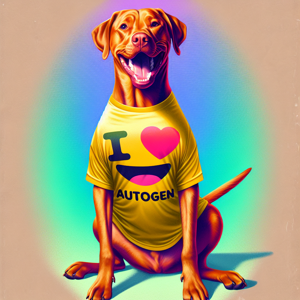

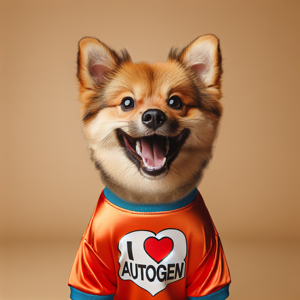

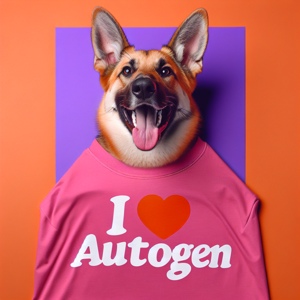

In [45]:
images = extract_images(dalle, critic)

for image in reversed(images):
    display(image.resize((300, 300)))